### ![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fhackathon&branch=master&subPath=SustainabilityOnMars/AmalTrack/ChallengeTemplate/challenge-template.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

# *Sustaining Life on Mars: Data Science Challenge*.

You’re a data scientist on a team of newly-arrived humans. While you were on Earth, you figured out how you could make the planet habitable. From growing food to clothing needs, you need to start building the framework for sustaining life on the red planet. 

Use data to answer questions such as:

1. What food do we need to bring?
        e.g. trees, seeds, genetically-modified foods
        
2. How do we feed people there?
        Consider: supply, manage, distribute, connect

7. What are essential key resources? 
        e.g. Electricity, oxygen, water, fuel, brick, plastics, steel, food. 

4. How do we decide who will go?
        e.g. population proportions, demographics, health, qualifications, genetic diversity

5. What forms of entertainment would people need? 
        e.g. music, books, pets, lego

6. What machines do we need? 
        e.g. cars, ships, fighter jets, rockets, computers, mobile phones.  
        
#### Choose one or more of these questions to answer, or come up with your own. Check out the example notebooks, and complete the sections in this notebook to answer your chosen question or questions

### Section I: About Me

Double-click this cell and tell us:
    1. My name: Bill Bai
    2. My email address: billbai0102@gmail.com
    3. Why I picked this challenge: I'm looking for a challenge and to build on my data science skills
    4. The questions I picked: 
        - Who do we decide to go
        - What forms of entertainment would people need
        - How do we feed people there

### Section II: The data I used

Please provide the following information: (Double-click to edit this cell)

✏️ 
1. Name of dataset
    - UN World Fertility Indicators
    - UN World Period Indicators
    - IMDb Movies Extensive Dataset
    - World Food/Feed Production
2. Link to dataset
    - https://population.un.org/wpp/Download/Standard/CSV/
    - https://population.un.org/wpp/Download/Standard/CSV/
    - https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset
    - https://www.kaggle.com/dorbicycle/world-foodfeed-production
3. Why I picked the dataset
    - Fertility will allow me to see who has the highest fertility, thus making it easier to sustain life on mars.
    - Period indicators gives me insight into birth rates, death rates, and infant mortality rates which could greatly affect life on mars.
    - The IMDb dataset will show me genres, directors, and movies that are liked around the world.
    - The Food/Feed dataset allows me to see the production of food, which we may need to replicate on mars.

###  Imported Libaries

In [1]:
# Uncomment if any libraries are not installed
# !pip install yaml --user
# !pip install numpy --user
# !pip install pandas --user
# !pip install seaborn --user
# !pip install pillow --user
# !pip install plotly --user
# !pip install matplotlib --user
# !pip install wordcloud --user

import yaml
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud, ImageColorGenerator

sns.set(rc={'figure.figsize': (15, 9)})

# How do we decide who will go?

### Section I: Background
How do we decide who will go to Mars? <br>
One way we could approach this problem is to bring people with the highest fertility rates and lowest infant mortality rates so we can establish a sustainable and fast-growing colony on Mars.

### Section II: The Datasets
#### WPP2019_Fertility_by_Age.csv
- This dataset contains data on the distribution of fertility rates between different age groups, countries, and periods of time. There are many columns so we'll go over the relevant ones only <br>
<b>Location</b> — The country/location where the data was collected. <br>
<b>Time</b> — The period of time that the data represents. <br>
<b>AgeGrp</b> — The age group that the data is recorded from. <br>
<b>ASFR</b> — Age Specific Birth Rate (birth per 1000 women), represents how many births are recorded are recorded per 1000 women. <br>
<b>PASFR</b> — Percentage Age Specific Birth Rate. As the name applies, it is proportionate to population and is a better way of representing birth rate.<br>

#### WPP2019_Period_Indicators_Medium.csv
- This dataset includes indicator data for periods of time. Once again, as there are many columns, we'll go over the relevant ones only<br>
<b>Location</b> — The country/location where the data was collected.<br>
<b>Time</b> — The peirod of time that the data represents.<br>
<b>LEx</b> — Life expectency of both males and females<br>
<b>IMR</b> — Infant (< 1 years old) mortality rate (infant deaths per 1000 live births)<br>
<b>Q5</b> — Under 5 mortality rate per 1000 live births<br>

#### Let's start!

First, we'll load the data into DataFrames so we can perform analysis.

In [2]:
# open fake_countries.yaml file, which contains non-real countries
with open('./data/wpp_data/fake_countries.yaml') as f:
    fake_countries = yaml.safe_load(f)['fake_countries']

# paths to the datasets
fertility_data = './data/wpp_data/WPP2019_Fertility_by_Age.csv'
period_indicator_data = './data/wpp_data/WPP2019_Period_Indicators_Medium.csv'

# load datasets in DataFrames
fertility_df = pd.read_csv(fertility_data)
period_indicator_df = pd.read_csv(period_indicator_data)

Now, we'll call the head() function to get an insight into the data as well as column names.

In [3]:
# get an insight into the fertility dataset
fertility_df.head()

LocID     Location  VarID Variant       Time  MidPeriod AgeGrp  \
0      4  Afghanistan      2  Medium  1950-1955       1953  15-19   
1      4  Afghanistan      2  Medium  1950-1955       1953  20-24   
2      4  Afghanistan      2  Medium  1950-1955       1953  25-29   
3      4  Afghanistan      2  Medium  1950-1955       1953  30-34   
4      4  Afghanistan      2  Medium  1950-1955       1953  35-39   

   AgeGrpStart  AgeGrpSpan     ASFR   PASFR   Births  
0           15           5  145.245   9.748  280.906  
1           20           5  313.809  21.061  522.501  
2           25           5  339.005  22.752  481.946  
3           30           5  290.535  19.499  351.097  
4           35           5  233.111  15.645  238.645

Text(0.5, 1.0, 'Distribution of Fertility Rates Between Age Groups(2020)')

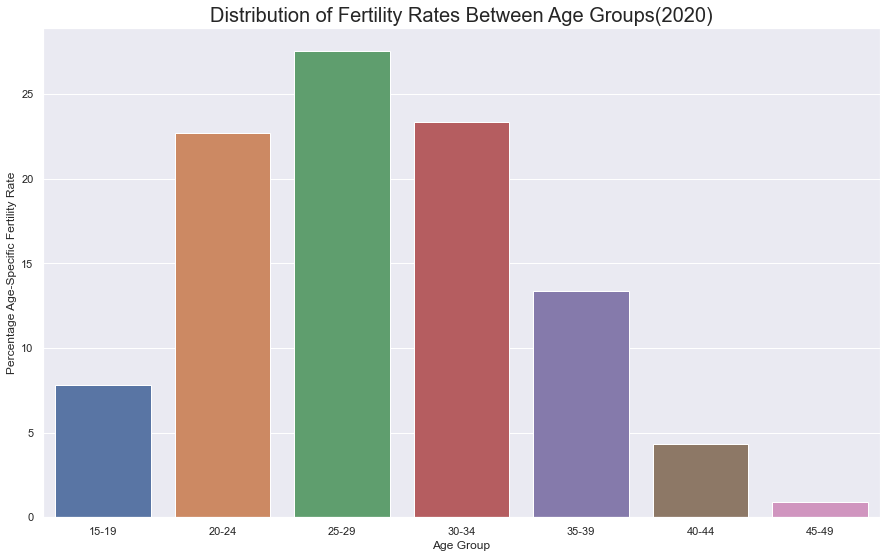

In [4]:
# get all unique age groups
age_groups = fertility_df['AgeGrp'].unique()

# create a new DataFrame of fertility rates for every age group, for 2015-2020
fertility_2018_df = fertility_df.loc[fertility_df['MidPeriod'] == 2018][['PASFR', 'AgeGrp']]

# get the mean PASFR of each age group
avg_br = fertility_2018_df.groupby('AgeGrp')['PASFR'].mean().reset_index()

# plot average fertility rates for each age group
ax = sns.barplot(x='AgeGrp', y='PASFR', data=avg_br)
ax.set(xlabel='Age Group', ylabel='Percentage Age-Specific Fertility Rate')
ax.axes.set_title('Distribution of Fertility Rates Between Age Groups(2020)', fontsize=20)

From this bar chart of the distribution of fertility rates between different age groups, we can clearly see that 25-29 year olds are the most fertile, and have a higher chance and success rate of populating our colony.

Now that we know 25-29 year olds are the most fertile, let's see which countries have the highest projected fertility rate growths.

Most fertile countries: ['Tajikistan', 'Mali', 'United Republic of Tanzania', 'Zambia', 'Mozambique', 'Guinea', 'Senegal', 'Comoros', "Côte d'Ivoire", 'Liberia']


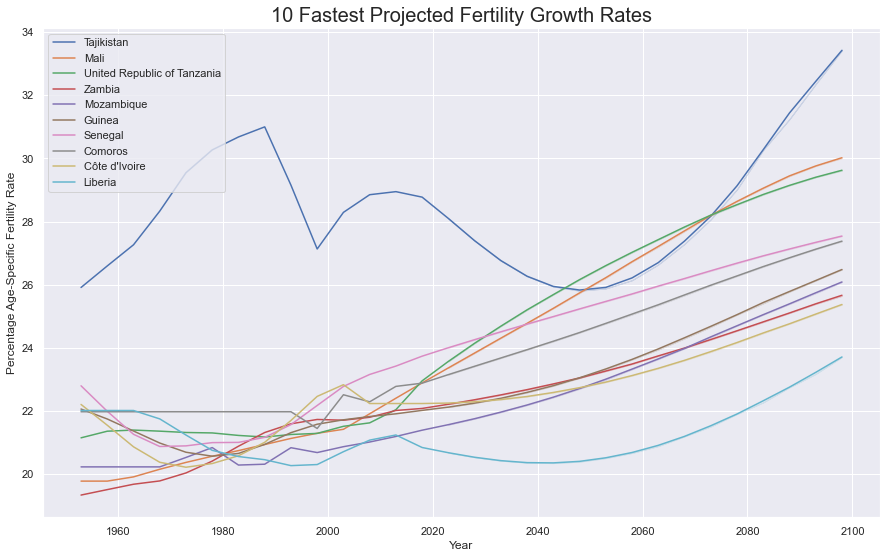

In [5]:
"""
custom aggregation function to find countries with the fastest (projected)
growing fertility rates

:param series: Series object containing PASFR data for each country
"""
def greatest_fertility(series):
    # placeholder values for the lowest, highest, and current fertility rate
    low = float('inf')
    high =  float('-inf')
    current = series.iloc[-1]

    # finds country with highest growing fertility rates
    for pasfr in series:
        if pasfr < low:
            low = pasfr
        elif pasfr > high:
            high = pasfr

    # return value if growth rate is increasing, -inf if growth rate is decreasing
    return (current - low) if high <= current else (float('-inf'))

# Create DataFrame where AgeGrp is 25-29 (the most fertile age group)
fertility_growth_df = fertility_df.loc[fertility_df['AgeGrpStart'] == 25]

# Groups and aggregates values for each country - sorts countries in order of fastest growing fertility rates
fertility_growth_df = fertility_growth_df.reset_index().groupby('Location')[['PASFR']]\
    .agg(greatest_fertility).reset_index().sort_values(by=['PASFR'], ascending=False).set_index('Location')

# drops all fake countries from the DataFrame
fertility_growth_df.drop(fake_countries, inplace=True)

# extract the top 10 fastest growing fertility rates
fertile_10_countries = list(fertility_growth_df.index[:10])
print(f'Most fertile countries: {fertile_10_countries}')

# Creates DataFrame with data of the top 10 fastest growing fertility rate countries
fertile_10_countries_df = fertility_df.loc[(fertility_df['Location'].isin(fertile_10_countries) == True)&\
                                           (fertility_df['AgeGrpStart']==25)]

# plot
fig, ax = plt.subplots()
for country in fertile_10_countries:
    graph = sns.lineplot(x='MidPeriod', y='PASFR', data=fertile_10_countries_df.loc[fertile_10_countries_df.Location==country],
                         ax=ax, ci=0)
graph.set(xlabel='Year', ylabel='Percentage Age-Specific Fertility Rate')
graph.axes.set_title('10 Fastest Projected Fertility Growth Rates', fontsize=20)
ax.legend(fertile_10_countries, loc='upper left')

From this line chart, we can see that these 10 countries have the highest projected fertility growth rates. Tajikstan especially has a steep projected growth. Like each other, they all have an upwards fertility growth rate trend.

Now, let's look at our indicator dataset.

In [6]:
# set index to the Location column for easy data access
period_indicator_df.set_index('Location', inplace=True)

# drop all fake countries from the dataset
period_indicator_df.drop(fake_countries, inplace=True)

# get an insight into the DataFrame
period_indicator_df

LocID  VarID Variant       Time  MidPeriod    TFR    NRR     CBR  \
Location                                                                        
Afghanistan      4      2  Medium  1950-1955       1953  7.450  1.636  50.314   
Afghanistan      4      2  Medium  1955-1960       1958  7.450  1.765  50.998   
Afghanistan      4      2  Medium  1960-1965       1963  7.450  1.899  51.477   
Afghanistan      4      2  Medium  1965-1970       1968  7.450  2.017  51.646   
Afghanistan      4      2  Medium  1970-1975       1973  7.450  2.141  51.234   
...            ...    ...     ...        ...        ...    ...    ...     ...   
Zimbabwe       716      2  Medium  2075-2080       2078  1.913  0.919  14.153   
Zimbabwe       716      2  Medium  2080-2085       2083  1.877  0.903  13.429   
Zimbabwe       716      2  Medium  2085-2090       2088  1.849  0.891  12.867   
Zimbabwe       716      2  Medium  2090-2095       2093  1.831  0.883  12.492   
Zimbabwe       716      2  Medium  2095-2100       2098  1.816  0.876  12.194   

               Births    LEx  ...     CDR    Deaths  DeathsMale  DeathsFemale  \
Location                      ...                                               
Afghanistan  2015.476  28.61  ...  36.862  1476.605     794.020       682.585   
Afghanistan  2201.589  31.13  ...  33.718  1455.605     783.110       672.495   
Afghanistan  2439.130  33.74  ...  30.808  1459.784     777.437       682.347   
Afghanistan  2728.221  36.15  ...  28.223  1490.896     790.745       700.151   
Afghanistan  3056.451  38.74  ...  25.495  1520.938     802.414       718.524   
...               ...    ...  ...     ...       ...         ...           ...   
Zimbabwe     2100.753  72.09  ...   9.407  1396.229     729.240       666.989   
Zimbabwe     2030.941  72.73  ...  10.001  1512.603     794.805       717.798   
Zimbabwe     1970.518  73.36  ...  10.631  1627.991     853.756       774.235   
Zimbabwe     1926.925  74.00  ...  11.191  1726.185     899.147       827.038   
Zimbabwe     1886.759  74.66  ...  11.611  1796.481     927.691       868.790   

              CNMR  NetMigrations  GrowthRate  NatIncr    SRB     MAC  
Location                                                               
Afghanistan -0.499          -20.0       1.296   13.452  1.060  29.835  
Afghanistan -0.463          -20.0       1.683   17.280  1.060  29.835  
Afghanistan -0.422          -20.0       2.026   20.669  1.060  29.835  
Afghanistan -0.379          -20.0       2.307   23.423  1.060  29.835  
Afghanistan -0.335          -20.0       2.544   25.739  1.060  29.835  
...            ...            ...         ...      ...    ...     ...  
Zimbabwe    -0.337          -50.0       0.441    4.746  1.021  29.872  
Zimbabwe    -0.331          -50.0       0.310    3.428  1.021  29.984  
Zimbabwe    -0.326          -50.0       0.191    2.236  1.021  30.094  
Zimbabwe    -0.324          -50.0       0.098    1.301  1.021  30.201  
Zimbabwe    -0.323          -50.0       0.026    0.583  1.021  30.307  

[12120 rows x 24 columns]

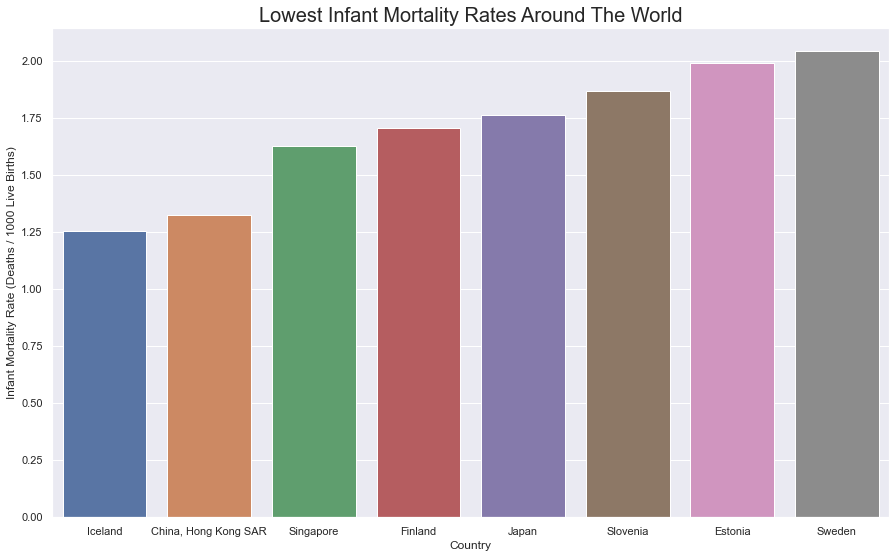

Average Births Per Woman in Iceland: 	1.10833
Average Births Per Woman in Singapore: 	0.70896
Average Births Per Woman in Mali: 	2.71022


In [7]:
# create DataFrame grouped by country with lowest infant mortality rates
nrr_projected_df = period_indicator_df.loc[period_indicator_df['MidPeriod']==2018].groupby(['Location'])['IMR'].mean()\
    .reset_index().sort_values(by='IMR', ascending=True).reset_index()

# plot countries with lowest IMRs
ax = sns.barplot('Location', 'IMR', data=nrr_projected_df[:8])
ax.set(xlabel='Country', ylabel='Infant Mortality Rate (Deaths / 1000 Live Births)')
ax.axes.set_title('Lowest Infant Mortality Rates Around The World', fontsize=20)
plt.show()

iceland_birthrate = fertility_df.loc[(fertility_df['Location']=='Iceland')&(fertility_df['AgeGrpStart']==25)\
                                     &(fertility_df['MidPeriod']==2018)]['ASFR'] / 100
singapore_birthrate = fertility_df.loc[(fertility_df['Location']=='Singapore')&(fertility_df['AgeGrpStart']==25)\
                                       &(fertility_df['MidPeriod']==2018)]['ASFR'] / 100
mali_birthrate = fertility_df.loc[(fertility_df['Location']=='Mali')&(fertility_df['AgeGrpStart']==25)\
                                  &(fertility_df['MidPeriod']==2018)]['ASFR'] / 100

print(f'Average Births Per Woman in Iceland: \t{float(iceland_birthrate)}')
print(f'Average Births Per Woman in Singapore: \t{float(singapore_birthrate)}')
print(f'Average Births Per Woman in Mali: \t{float(mali_birthrate)}')

This bar plot illustrates the top 10 countries with the lowest infant mortality rates. Ideally, these countries would be perfect for a mars colonization mission, however they all suffer from one problem - They have extremely low fertility rates. In Iceland and Singapore, two countries with the lowest infant mortality rates, their fertility rates are 1.1 and 0.7 births per woman respectively. However, in Mali, the average woman gives birth to nearly 3 children in their lifetime. Although these 10 countries have low IMRs, they also have low fertility rates making them bad candidates to sustain life on Mars.

However - there is one thing we've overlooked. Even though Mali has a high fertility rate, it also suffers from relatively high IMRs. We want people with high fertility rates and also low IMRs to sustain life on Mars. In the next section, we'll compile a list of countries that fulfill both of these goals.

In [8]:
"""
function that merges countries with fastest growing fertility rates and countries with lowest IMRs
to get countries with fast growing fertility rates AND low IMRs

:param imr: Countries with lowest IMR
:param fertile: Countries with fastest growing fertility rates
:param num_top: Number of countries to return
"""
def get_top_fertile_imr(imr, fertile, num_top):
    # placeholder list for top countries
    top_countries = []
    imr_i, imr_range = 0, 0
    fertile_i= 0

    # loops through all countries until top_countries list is full
    while len(top_countries) < num_top:
        nrr_range = 0
        top_country = None

        # finds
        for i in range(len(fertile)):
            if imr[imr_i] == fertile[i]:
                top_country = imr[i]
                nrr_range = i
                break

        for i in range(len(imr)):
            if fertile[fertile_i] == imr[i]:
                if i <= nrr_range:
                    top_country = fertile[fertile_i]
                    fertile_i += 1
                else:
                    imr_i += 1

        top_countries.append(top_country)

    return top_countries

top_nrr = nrr_projected_df.set_index('Location').index
top_fertility = fertility_growth_df.index

fertile_nrr_countries = get_top_fertile_imr(list(top_nrr), list(top_fertility), 10)
print(f'Top 5 countries with fertile people, and also low infant mortality rates: \n{fertile_nrr_countries[:5]}')

Top 5 countries with fertile people, and also low infant mortality rates: 
['Tajikistan', 'Philippines', 'Grenada', "Côte d'Ivoire", 'Malawi']


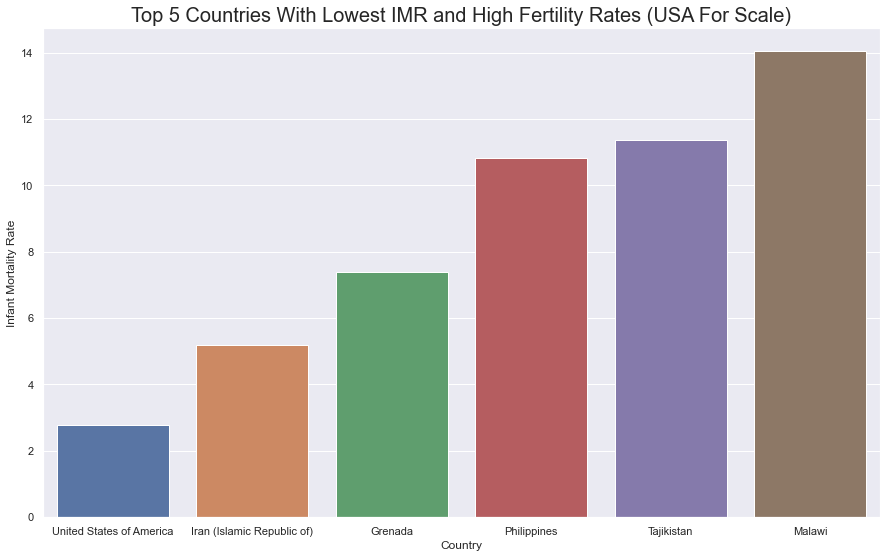

In [9]:
fertile_nrr_countries.append('United States of America') # USA for scale
nrr_top10 = period_indicator_df.loc[period_indicator_df['MidPeriod']>=2018].groupby(['Location'])['IMR'].mean()\
    .reset_index().sort_values(by='IMR', ascending=True).reset_index()
ax = sns.barplot('Location', 'IMR', data=nrr_top10.loc[nrr_top10['Location'].isin(fertile_nrr_countries)][:6])
ax.set(xlabel='Country', ylabel='Infant Mortality Rate')
ax.axes.set_title('Top 5 Countries With Lowest IMR and High Fertility Rates (USA For Scale)', fontsize='20')
plt.show()

By getting compiling a list of countries that have low IMRs and high fertility rates, we can see that people of Qatar, Iran, Grenada, Philippines, and Tajikstan are the most likely to sustain a colony on Mars. Not only will they reproduce fast and in large quantities, but they all have relatively low infant mortality rates, meaning not many infants will die in the process of colonization.

### Section III: So who's going?

Choosing who to go to Mars is a hard decision to make. However, one way to approach this dilemma is through choosing people who have the highest chance of sustaining the population. <br><br>
The first conclusion we've come to is that most of the colonizers we should send should be between the ages 25-29 years old. This can be rationalized through the first analysis we made, showing that those between 25 and 29 years old have the highest fertility rates, which can be a great benefit when starting and sustaining a new population on Mars. In addition, we should send 20-24 year olds too, as they can help us populate and sustain the population as they mature. <br><br>
Next we looked into countries with the fastest projected fertility growth rates. The list included countries such as Tajikistan, Zambia, Tanzania, and Liberia. We obviously want countries with high fertility growth rates to help us quickly populate and sustain our colony, however after doing some more analysis, we found something off about some of the fast growing fertility rate countries. Although they had high fertility growth rates, their infant mortality rates were also quite high, which effectively counters the fertility rates. We want our colony to grow, but if the population has a high infant mortality rate, we'll never grow fast enough. <br><br>
Which leads us to our next section. What if we look at countries with low infant mortality rates instead? By performing analysis on the world indicators dataset, we found that Iceland, Singpore, and Estonia were among the countries with the lowest infant mortality rates. However, like the conclusion in the section before, these countries also suffered a fatal flaw - they had extremely low fertility rates. For example, the average woman in Iceland gives birth to 1.1 children, and the average Singaporean woman gives birth to 0.7 children - That's a negative population growth rate! In fact, Singapore has the lowest fertility rates in the entire world. These countries are not ideal for sustaining a population, due to how slow they will populate Mars. <br><br>
Finally, with the insights we gained in the prior 3 sections, we can find ideal countries to populate Mars by compiling a list of top scorers in both the high fertility rate list, and also the low IMR list. The five countries we ended up with are Iran, Grenada, Philippines, Tajikistan, and Malawi. These countries not only have high fertility rates, but also relatively low infant mortality rates. These countries will be ideal to populate Mars, as their population can grow fast, and also at a relatively low rate of infant deaths. However, to increase genetic diversity, we will send people from all over the world to populate and sustain life on Mars. We'll send more people from these five countries, as they will be main drivers of the population.

# What Forms of Entertainment Would People Need?

### Section I: Background
What forms of entertainment would people need? <br>
Let's find any trend we can in the IMDb datasets we'll be using, to find ideal movies that will help humanity sustain life and boost moral on Mars.

### Section II: The Datasets
#### IMDbMovies.csv
- Contains general data on more than 81,000 movies, which includes the movie name, director, genre, etc.<br>
<b>imdb_title_id</b> — The id of a movie title, which connects with the ratings dataset.<br>
<b>title</b> — The title of the movie.<br>
<b>year</b> — Year that the movie was published.<br>
<b>date_published</b> — Exact date that the movie was published.<br>
<b>genre</b> — List of genres that the movie falls under<br>
<b>description</b> — Description of the movie<br>

#### IMDbRatings.csv
- Contains data on ratings for movies in the IMDbMovies.csv dataset <br>
<b>imdb_title_id</b> — The id of a movie title, which connects with the ratings dataset.<br>
<b>weighted_average_vote</b> — Rating for a movie obtained by getting a weighted average of multiple votes<br>
<b>total_votes</b> — Number of votes that contribute to the weighted average vote<br>

#### Let's Start!

In [10]:
# load paths to the datasets
imdb_movies_data = './data/entertainment_data/IMDb movies.csv'
imdb_ratings_data = './data/entertainment_data/IMDb ratings.csv'

# create DataFrame objects for each dataset
imdb_movies_df = pd.read_csv(imdb_movies_data)
imdb_ratings_df = pd.read_csv(imdb_ratings_data)

Now that we've loaded in our datasets, let's get an insight of both of the datasets.

In [11]:
# get an insight into the movies dataset
imdb_movies_df.head()

imdb_title_id                                              title  \
0     tt0000574                        The Story of the Kelly Gang   
1     tt0001892                                     Den sorte drøm   
2     tt0002101                                          Cleopatra   
3     tt0002130                                          L'Inferno   
4     tt0002199  From the Manger to the Cross; or, Jesus of Naz...   

                                      original_title  year date_published  \
0                        The Story of the Kelly Gang  1906     1906-12-26   
1                                     Den sorte drøm  1911     1911-08-19   
2                                          Cleopatra  1912     1912-11-13   
3                                          L'Inferno  1911     1911-03-06   
4  From the Manger to the Cross; or, Jesus of Naz...  1912           1913   

                       genre  duration           country language  \
0    Biography, Crime, Drama        70         Australia      NaN   
1                      Drama        53  Germany, Denmark      NaN   
2             Drama, History       100               USA  English   
3  Adventure, Drama, Fantasy        68             Italy  Italian   
4           Biography, Drama        60               USA  English   

                              director  ...  \
0                         Charles Tait  ...   
1                            Urban Gad  ...   
2                   Charles L. Gaskill  ...   
3  Francesco Bertolini, Adolfo Padovan  ...   
4                        Sidney Olcott  ...   

                                              actors  \
0  Elizabeth Tait, John Tait, Norman Campbell, Be...   
1  Asta Nielsen, Valdemar Psilander, Gunnar Helse...   
2  Helen Gardner, Pearl Sindelar, Miss Fielding, ...   
3  Salvatore Papa, Arturo Pirovano, Giuseppe de L...   
4  R. Henderson Bland, Percy Dyer, Gene Gauntier,...   

                                         description avg_vote votes   budget  \
0  True story of notorious Australian outlaw Ned ...      6.1   537   $ 2250   
1  Two men of high rank are both wooing the beaut...      5.9   171      NaN   
2  The fabled queen of Egypt's affair with Roman ...      5.2   420  $ 45000   
3  Loosely adapted from Dante's Divine Comedy and...      7.0  2019      NaN   
4  An account of the life of Jesus Christ, based ...      5.7   438      NaN   

   usa_gross_income worlwide_gross_income metascore reviews_from_users  \
0               NaN                   NaN       NaN                7.0   
1               NaN                   NaN       NaN                4.0   
2               NaN                   NaN       NaN               24.0   
3               NaN                   NaN       NaN               28.0   
4               NaN                   NaN       NaN               12.0   

   reviews_from_critics  
0                   7.0  
1                   2.0  
2                   3.0  
3                  14.0  
4                   5.0  

[5 rows x 22 columns]

In [12]:
# get an insight into the ratings dataset
imdb_ratings_df.head()

imdb_title_id  weighted_average_vote  total_votes  mean_vote  median_vote  \
0     tt0000574                    6.1          537        6.3          6.0   
1     tt0001892                    5.9          171        6.1          6.0   
2     tt0002101                    5.2          420        5.2          5.0   
3     tt0002130                    7.0         2019        6.9          7.0   
4     tt0002199                    5.7          438        5.8          6.0   

   votes_10  votes_9  votes_8  votes_7  votes_6  ...  females_30age_avg_vote  \
0        54       17       55      121      122  ...                     6.0   
1         5        6       17       41       52  ...                     5.8   
2        12        8       16       60       89  ...                     5.5   
3       194      208      386      571      308  ...                     7.3   
4        28       15       42       75      114  ...                     4.8   

   females_30age_votes  females_45age_avg_vote  females_45age_votes  \
0                 19.0                     6.6                 14.0   
1                  4.0                     6.5                  8.0   
2                 14.0                     6.2                 20.0   
3                 74.0                     7.4                 75.0   
4                 10.0                     6.5                 15.0   

   top1000_voters_rating  top1000_voters_votes  us_voters_rating  \
0                    6.3                  64.0               6.0   
1                    5.9                  29.0               6.2   
2                    4.9                  57.0               5.5   
3                    7.0                 126.0               7.1   
4                    5.7                  56.0               5.9   

   us_voters_votes  non_us_voters_rating  non_us_voters_votes  
0             89.0                   6.2                309.0  
1             27.0                   6.0                114.0  
2            197.0                   4.7                103.0  
3            452.0                   7.0               1076.0  
4            161.0                   5.7                164.0  

[5 rows x 49 columns]

To make it easier to plot data, we'll move a few columns from the ratings DataFrame onto the movies DataFrame.

In [13]:
# map the rating column from the ratings DataFrame onto the movies DataFrame for easy access
imdb_movies_df['rating'] = imdb_movies_df['imdb_title_id'].map(imdb_ratings_df.set_index('imdb_title_id')\
                                                               ['weighted_average_vote'])

# get an insight into the new movies DataFrame
imdb_movies_df.head(2)

imdb_title_id                        title               original_title  \
0     tt0000574  The Story of the Kelly Gang  The Story of the Kelly Gang   
1     tt0001892               Den sorte drøm               Den sorte drøm   

   year date_published                    genre  duration           country  \
0  1906     1906-12-26  Biography, Crime, Drama        70         Australia   
1  1911     1911-08-19                    Drama        53  Germany, Denmark   

  language      director  ...  \
0      NaN  Charles Tait  ...   
1      NaN     Urban Gad  ...   

                                         description avg_vote votes  budget  \
0  True story of notorious Australian outlaw Ned ...      6.1   537  $ 2250   
1  Two men of high rank are both wooing the beaut...      5.9   171     NaN   

   usa_gross_income  worlwide_gross_income metascore reviews_from_users  \
0               NaN                    NaN       NaN                7.0   
1               NaN                    NaN       NaN                4.0   

  reviews_from_critics  rating  
0                  7.0     6.1  
1                  2.0     5.9  

[2 rows x 23 columns]

Cool! Let's start our analyses

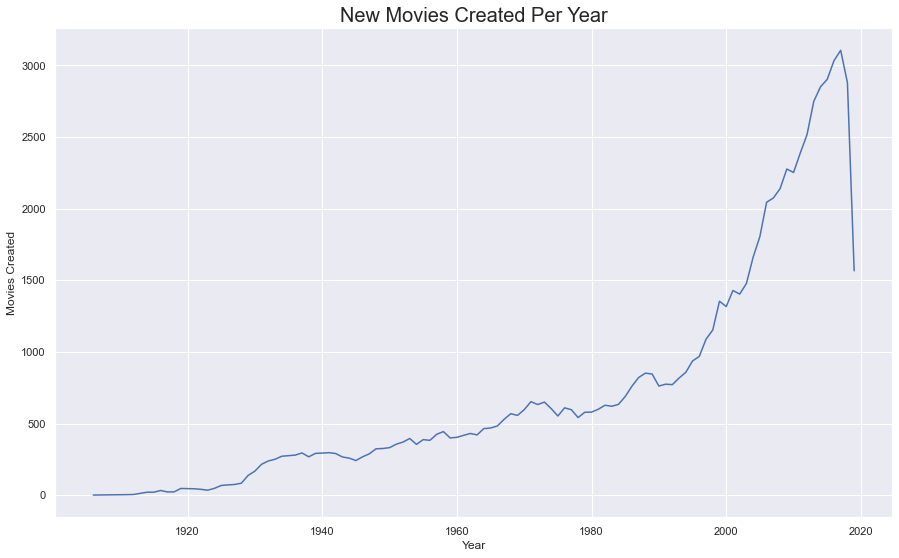

In [14]:
# group movies by year, and count how many movies are created
movies_per_year = imdb_movies_df.groupby('year').count().reset_index()

# plot data on how many movies are created per year
ax = sns.lineplot(x='year', y='title', data=movies_per_year)
ax.set(xlabel='Year', ylabel='Movies Created')
ax.axes.set_title('New Movies Created Per Year', fontsize='20')
plt.show()

From the looks of it, the industry saw a boom in new releases in the late 2010s. This means most of the movies we'll be watching on Mars will be from the 2010s era.

Next, let's take a look at popular directors.

In [15]:
# group by director and calculate their mean ratings and total number of votes.
director_ratings_df = imdb_movies_df.groupby('director').agg({'rating':np.mean, 'votes': np.sum}).reset_index()\
    .sort_values(by='rating')

# create a new column, total_score, which is calculated by multiplying the directors' ratings and their total votes.
director_ratings_df['total_score'] = director_ratings_df['rating'] * director_ratings_df['votes']

# sort the DataFrame by their total scores in descending order
director_ratings_df.sort_values(by='total_score', inplace=True, ascending=False)
director_ratings_df = director_ratings_df.reset_index().drop('index', axis=1)

# print top 10 directors
print('Top 10 directors:')
director_ratings_df.head(10)

Top 10 directors:


director    rating     votes   total_score
0  Christopher Nolan  8.250000  10995891  9.071610e+07
1   Steven Spielberg  7.340625  11114540  8.158767e+07
2  Quentin Tarantino  7.900000   7774944  6.142206e+07
3    Martin Scorsese  7.556000   7279895  5.500689e+07
4      Peter Jackson  7.576923   7023383  5.321563e+07
5      David Fincher  7.760000   6595585  5.118174e+07
6       Ridley Scott  7.008000   6652653  4.662179e+07
7    Robert Zemeckis  7.178947   5609779  4.027231e+07
8      James Cameron  7.900000   4726409  3.733863e+07
9    Stanley Kubrick  7.792308   4013329  3.127309e+07

By multiplying the directors' movies' ratings and votes, we can get a general understanding of how popular they are. From the looks of it, the 3 most popular directors are Christopher Nolan, Steven Spielberg, and Quentin Tarantino.

We'll make a scatterplot to see how these directors rank in terms of average ratings and number of votes. Both are valuable metrics when determining their popularity.

In [16]:
# create title object for the plot
plotly_title = {
    'text': 'Most Popular Directors'
    , 'x': 0.5
    , 'y': 0.9
    , 'xanchor': 'center'
    , 'yanchor': 'top'
}

# create a scatterplot with the directors' average ratings and total votes.
fig = go.Figure(data=go.Scatter(
    x=director_ratings_df['rating'][:50]
    , y=director_ratings_df['votes'][:50]
    , mode='markers'
    , marker_color=director_ratings_df['total_score'][:50]
    , text=director_ratings_df['director'][:50]
    , marker=dict(
        colorscale="Portland"
    )
))
fig.update_layout(
    title=plotly_title
    , xaxis_title='Average Rating'
    , yaxis_title='Total Votes'
)

# show plot
fig.show()

Just like the DataFrame we made, we can see the most popular are Christopher Nolan, Steven Spielberg, and Quentin Tarantino. Although Spielberg has a lower average rating than Tarantino, he has more total votes which reflects his popularity. In this plot, we can see most of the directors are American/Canadian/British, however there are also a few Japanese and Indian directors mixed in.

Next, we'll see how the different genres compare. Before we do so, we'll have to split the 'genre' column up, since we need them in individual rows.

In [17]:
"""
splits the genre column into separate rows with individual genres.

:param df: DataFrame to split up
"""
def count_genres(df):
    new_df = {
        'genre': []
        , 'title': []
        , 'rating': []
        , 'duration': []
        , 'votes': []
    }
    
    # loops through all rows in the DataFrame
    for row in df.iterrows():
        row = row[1]
        genre = row['genre']
        title = row['title']
        rating = row['rating']
        duration = row['duration']
        votes = row['votes']
        
        # loops through the genre list in each row.
        for genre_name in genre.split(','):
            genre_name = genre_name.split()[0]

            new_df['genre'].append(genre_name)
            new_df['title'].append(title)
            new_df['duration'].append(duration)
            new_df['rating'].append(rating)
            new_df['votes'].append(votes)
            
    # returns new DataFrame with split up genres.
    return pd.DataFrame(new_df)

# generate genre vs rating DataFrame
genre_ratings_df = count_genres(imdb_movies_df)

# get an insight into the DataFrame
genre_ratings_df

genre                        title  rating  duration  votes
0       Biography  The Story of the Kelly Gang     6.1        70    537
1           Crime  The Story of the Kelly Gang     6.1        70    537
2           Drama  The Story of the Kelly Gang     6.1        70    537
3           Drama               Den sorte drøm     5.9        53    171
4           Drama                    Cleopatra     5.2       100    420
...           ...                          ...     ...       ...    ...
166216      Drama                        Ottam     7.8       120    510
166217      Drama                    Pengalila     8.4       111    604
166218      Drama    Padmavyuhathile Abhimanyu     8.4       130    369
166219      Drama            Sokagin Çocuklari     7.2        98    190
166220     Family            Sokagin Çocuklari     7.2        98    190

[166221 rows x 5 columns]

In [18]:
# group genre df by genre and aggregate each row
grouped_genre_df = genre_ratings_df.groupby('genre').agg({
    'title': np.count_nonzero  # count titles
    , 'rating': np.mean        # get the average rating
    , 'duration': np.mean      # get average duration
    , 'votes': np.sum          # calculate total votes
}).reset_index()

# create total_score column by multiplying the average rating column by the total votes column
grouped_genre_df['total_score'] = (grouped_genre_df['rating'] * grouped_genre_df['votes'])

# sort the DataFrame by the genre's total score
grouped_genre_df = grouped_genre_df.sort_values(by='total_score', ascending=False).reset_index().drop('index', axis=1)

# get top 5 most popular genres
grouped_genre_df.head()

genre  title    rating    duration      votes   total_score
0      Drama  44404  6.267620  104.059499  383272842  2.402209e+09
1     Comedy  27873  5.892864   98.304273  229184548  1.350553e+09
2     Action  12106  5.633950  106.641583  238759511  1.345159e+09
3  Adventure   7082  5.845835   99.782265  201525136  1.178083e+09
4      Crime  10461  6.050884  100.552624  141155839  8.541176e+08

By calculating each genre's total score, we can see which genres are the most popular. From this DataFrame, we can see that Drama takes the title of most popular genre by a long shot. It's almost twice as popular as the second most popular genre, comedy. Following comedy comes action, adventure and crime.

For our next step, we'll create a pie chart on how each genre dominates the market by overall score, and by number of movies pertaining to the genre.

In [19]:
# set title of pie chart
plotly_title = {
    'text': 'Most Popular Directors'
    , 'x': 0.44
    , 'y': 0.93
    , 'xanchor': 'center'
    , 'yanchor': 'top'
}
plotly_title['text'] = f'Most Popular Genre by Rating{" " * 20}|{" " * 18}Most Popular Genre by Movies'

# create pie chart
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=grouped_genre_df['genre'][:15], values=grouped_genre_df['total_score'][:15]), 1, 1)
fig.add_trace(go.Pie(labels=grouped_genre_df['genre'][:15], values=grouped_genre_df['title'][:15]), 1, 2)
fig.update_layout(
   title=plotly_title
    , margin=dict(t=1, b=1, l=1, r=1) 
)
fig.update_traces(hoverinfo="label+percent")

# display pie chart
fig.show()

As you can see, 31.5% of movies ever produced are mainly Dramas, while taking around 24.7% of the total score. An interesting thing that can be observed is that despite only being around 5% of total movies made, adventuer movies account for 12.1% of the total score. This shows that adventure movies are generally liked by people. Adversely, Romance movies make up nearly 10% of all movies, but only takes up 6.25% of the total score. This shows that Romance movies, unlike Adventure movies, generally aren't liked that much. 

In [20]:
# remove inappropriate genres lol
grouped_genre_df = grouped_genre_df.set_index('genre').drop('Adult').reset_index()

# sort genres by duration
grouped_genre_df = grouped_genre_df.sort_values(by='duration', ascending=False)

# set title for plot
plotly_title['text'] = 'Average Film Length By Genre'
plotly_title['x'] = 0.5

# create plot
fig = go.Figure(data=go.Bar(
    x=grouped_genre_df['genre']
    , y=grouped_genre_df['duration']
))
fig.update_layout(
    title=plotly_title
)

# show plot
fig.show()

avg_genre_duration = round(grouped_genre_df['duration'].mean(), 2)
print(f'Average duration per genre: {avg_genre_duration}')

Average duration per genre: 98.78


To sustain life on Mars, we'll need lots of entertainment. One way we can do this is stock up on movies that are longer. 

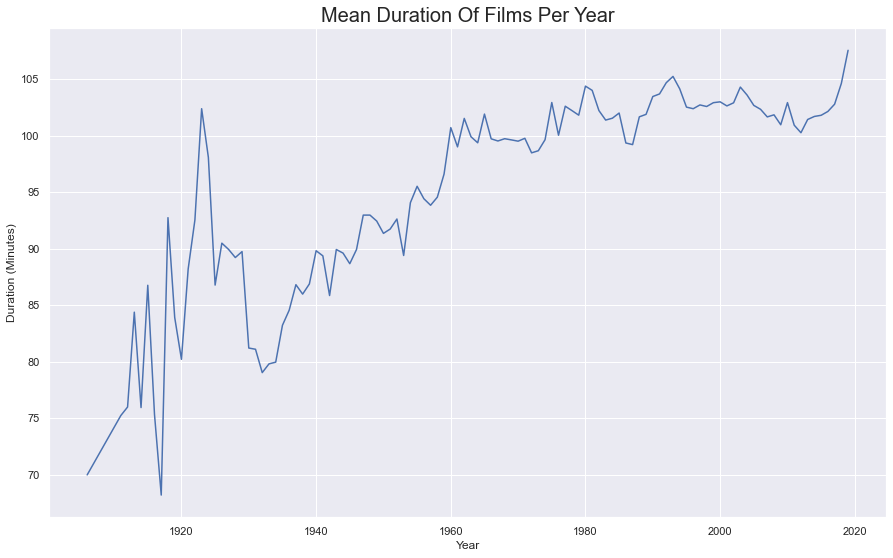

Average duration per genre: 95.18


In [21]:
# group by year and calculate mean duration
duration_by_year = imdb_movies_df.groupby('year')['duration'].mean().reset_index()

# create lineplot
ax = sns.lineplot(x='year', y='duration', data=duration_by_year)
ax.set(xlabel='Year', ylabel='Duration (Minutes)')
ax.axes.set_title('Mean Duration Of Films Per Year', fontsize=20)
plt.show()

# calculate average duration per year
avg_year_duration = round(duration_by_year['duration'].mean(), 2)
print(f'Average duration per genre: {avg_year_duration}')



Lastly, we'll make a word cloud of common words in movie titles and see if any words stand out.

In [22]:
# create list of titles
titles = list(imdb_movies_df['title'])

# convert titles into string, the split into individual word list
titles = ' '.join(titles).split(' ')

# count unique words
t_count = Counter(titles)

# sanity check - count # of appearences for "story"
t_count['Story']

262

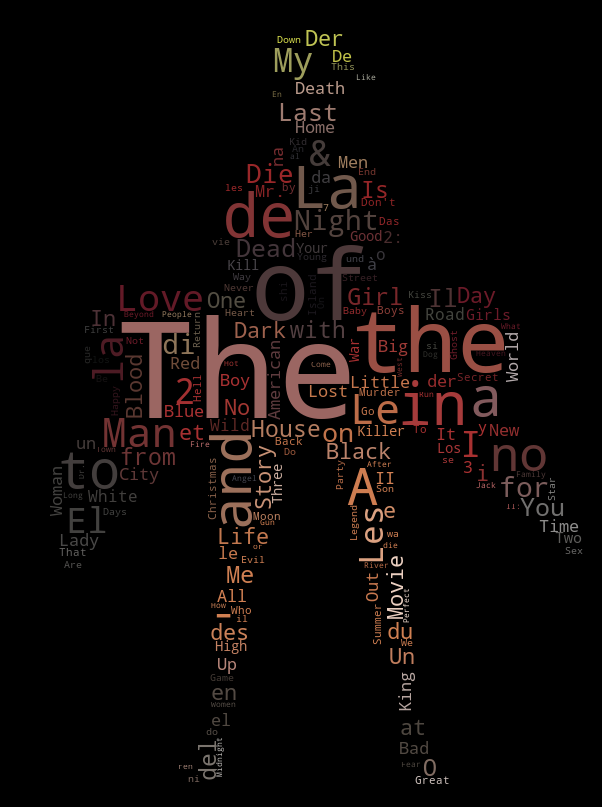

In [23]:
# open mask image
image = Image.open('./data/entertainment_data/images/naruto_pose.png')

# convert image into numpy array
mask = np.array(image)

# generate mask from image array
image_generator = ImageColorGenerator(mask)

# generate word cloud
wc = WordCloud(mask=mask, color_func=image_generator, background_color='black')
wc.generate_from_frequencies(t_count)

# display word cloud
wc.to_image()

# yes, that's a picture of Naruto as a word map :D

Ignoring common words like "the", "of", "and", etc, we can see that some words stand out in the word cloud. The most noticeable ones are "last". As well, we can see some foreign words stand out such as "el", and "le", which are Spanish and French words. This shows that French and Spanish movies are quite popular in our dataset.

### Section III: Conclusion

# What Food Do We Need To Bring?

### Section I: Background
When sustaining life on mars, it is important to 

#### Section II: The Data
#### FAO.csv
- Contains data on food production around the world. <br>
<b>Area</b> — The country where the food is produced<br>
<b>Item</b> — Name of food that is produced<br>
<b>Unit</b> — How the food is measured<br>
<b>Element</b> — Food/Feed - Food is for human consumption, feed is for animal consumption<br>
<b>Y[Year]</b> — Amount of food produced that year<br>

In [24]:
# load path to dataset and create DataFrame
food_data_path = './data/food_data/FAO.csv'
food_df = pd.read_csv(food_data_path, encoding='latin-1')

# print all columns
print(f'Columns: {list(food_df.columns)}')

# get first five rows
food_df.head()

Columns: ['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013']


Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   

                       Item  Element Code Element         Unit  latitude  \
0        Wheat and products          5142    Food  1000 tonnes     33.94   
1  Rice (Milled Equivalent)          5142    Food  1000 tonnes     33.94   
2       Barley and products          5521    Feed  1000 tonnes     33.94   
3       Barley and products          5142    Food  1000 tonnes     33.94   
4        Maize and products          5521    Feed  1000 tonnes     33.94   

   longitude  ...   Y2004   Y2005   Y2006   Y2007   Y2008   Y2009   Y2010  \
0      67.71  ...  3249.0  3486.0  3704.0  4164.0  4252.0  4538.0  4605.0   
1      67.71  ...   419.0   445.0   546.0   455.0   490.0   415.0   442.0   
2      67.71  ...    58.0   236.0   262.0   263.0   230.0   379.0   315.0   
3      67.71  ...   185.0    43.0    44.0    48.0    62.0    55.0    60.0   
4      67.71  ...   120.0   208.0   233.0   249.0   247.0   195.0   178.0   

    Y2011  Y2012  Y2013  
0  4711.0   4810   4895  
1   476.0    425    422  
2   203.0    367    360  
3    72.0     78     89  
4   191.0    200    200  

[5 rows x 63 columns]

In [25]:
# check if all units are the same
food_df['Unit'].unique()

array(['1000 tonnes'], dtype=object)

In [26]:
# group by item and element and find mean production for each item/element
food = food_df.groupby(['Item', 'Element'])['Y2013'].sum().reset_index()\
    .sort_values('Y2013', ascending=False).reset_index().drop('index', axis=1)

# DataFrame with only Food data
produce = food.loc[food['Element'] == 'Food'].reset_index().drop('index', axis=1)

# print first and last 5 rows of the dataset
produce

Item Element    Y2013
0     Milk - Excluding Butter    Food  1259476
1    Cereals - Excluding Beer    Food  1029017
2                  Vegetables    Food   982974
3           Vegetables, Other    Food   762130
4     Fruits - Excluding Wine    Food   544878
..                        ...     ...      ...
110                    Cloves    Food       46
111           Fish, Liver Oil    Food       12
112              Palm kernels    Food        7
113                Cottonseed    Food        0
114     Meat, Aquatic Mammals    Food        0

[115 rows x 3 columns]

In [27]:
# change title of plot
plotly_title['text'] = 'Most Produced Items'

# createe bar plot
fig = go.Figure(
    data=go.Bar(y=produce['Item'][:10], x=produce['Y2013'][:10], marker_color=produce['Y2013'], orientation='h')
)
fig.update_layout(
    title=plotly_title
    , xaxis_title='Mass produced (1000 tons)'
    , yaxis_title='Food Name'
)

# show bar plot
fig.show()

In [28]:
# create a list of formatted years
years = [('Y' + str(i)) for i in range(1961, 2013 + 1)]

# create 'total' column by finding sum of food production throughout the years
food_df['total'] = food_df[years].sum(axis=1)

# creat 'mean' column by calculating mean food production for each country
food_df['mean'] = food_df['total'] / len(years)

# create DataFrame with only 'Food' elements and calculate mean production
food_mean = food_df.loc[food_df['Element']=='Food'].groupby('Area')['total'].mean().reset_index()

# set name of plot
plotly_title['text'] = 'Biggest Mean Producers Around The World'

# create choropleth plot
fig = go.Figure(data=go.Choropleth(
    locations=food_mean['Area']
    , locationmode='country names'
    , z=food_mean['total']
))
fig.update_layout(
    title=plotly_title
)

# show chloropleth
fig.show()

In [56]:
foods = ['Cereals - Excluding Beer', 'Vegetables', 'Milk - Excluding Butter', 'Meat']
cereals_df = food_df.loc[food_df['Item'] == foods[0]][years].sum()
vegetables_df = food_df.loc[food_df['Item'] == foods[1]][years].sum()
milk_df = food_df.loc[food_df['Item'] == foods[2]][years].sum()
meat_df = food_df.loc[food_df['Item'] == foods[3]][years].sum()

production_years = [int(year[1:]) for year in years]
y_cereal = [item for item in [cereals_df[year] for year in years]]
y_vegetables = [item for item in [vegetables_df[year] for year in years]]
y_milk = [item for item in [milk_df[year] for year in years]]
y_meat = [item for item in [meat_df[year] for year in years]]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=production_years
    , y=y_cereal
    , mode='lines'
    , name='Cereals'
))
fig.add_trace(go.Scatter(
    x=production_years
    , y=y_vegetables
    , mode='lines'
    , name='Vegetables'
))
fig.add_trace(go.Scatter(
    x=production_years
    , y=y_milk
    , mode='lines'
    , name='Milk'
))
fig.add_trace(go.Scatter(
    x=production_years
    , y=y_meat
    , mode='lines'
    , name='Meats'
))
fig.show()

In [84]:
from sklearn.linear_model import LinearRegression

production_df = food_df[years].sum()
y_production = [item for item in [production_df[year] for year in years]]

production_years_t = np.asarray(production_years).reshape(-1, 1)
y_production_t = np.asarray(y_production).reshape(-1, 1)
model = LinearRegression().fit(production_years_t, y_production_t)
print(f'Model Accuracy: {model.score(production_years_t, y_production_t)}')
print(model.predict(y_production_t).reshape(1, -1))

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=production_years
    , y=y_production
    , mode='lines'
    , name='Production'
))
fig.add_trace(go.Scatter(
    x=production_years
    , y=y_production
    , mode='lines'
    , name='hi'
))
fig.show()


Model Accuracy: 0.9704093662636196
[[5.98197822e+11 6.15118645e+11 6.29471295e+11 6.43145376e+11
  6.66536956e+11 6.92383927e+11 7.05963852e+11 7.30474533e+11
  7.48637662e+11 7.66787975e+11 7.78976757e+11 7.88834720e+11
  8.19084786e+11 8.18481575e+11 8.40910069e+11 8.47438583e+11
  8.76220609e+11 9.18604262e+11 9.37133589e+11 9.36615478e+11
  9.54977512e+11 9.83560291e+11 1.00173829e+12 1.04050285e+12
  1.05517812e+12 1.07785422e+12 1.10911556e+12 1.11535204e+12
  1.14102454e+12 1.15837889e+12 1.17082297e+12 1.35121776e+12
  1.38772498e+12 1.41542926e+12 1.44185347e+12 1.48025713e+12
  1.50293733e+12 1.52880618e+12 1.57443845e+12 1.63073422e+12
  1.65583359e+12 1.68014998e+12 1.70626865e+12 1.75680470e+12
  1.78013681e+12 1.81234637e+12 1.85676778e+12 1.90922420e+12
  1.91556850e+12 1.95541474e+12 2.02081609e+12 2.05696480e+12
  2.11197196e+12]]


### Section IV: Conclusion

It is crucial that you connect what you learned via the dataset to the main question(s) you are asking. 

Use this space to propose a solution to the question you picked. Make sure it is clear in your answer what area of development you chose to focus on and your proposed solution based on the dataset(s) you worked on. 

See our example notebooks for some inspiration on questions and solutions that you can develop using data.

Provide your analysis-driven result(s) here. Write down 2 - 3 things you learned from the data and how they help answer your main question(s). Also write down 2 - 3 things you learned from participating in this hackathon. 
Double-click to edit this cell. 

✏️ 

### [![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)